In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import numpy as np

from sklearn.preprocessing import MinMaxScaler

from torchvision import datasets
import torchvision.transforms as T

## My own modules
import viz_utils as vu
import train_utils as tu
import model_utils as mu
###

import imp
imp.reload(vu)
imp.reload(mu)
imp.reload(tu)

/var/folders/wb/ttr9x7pn27q1_rp5vtjfr0s00000gn/T/ipykernel_3394/3262691840.py:22: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'train_utils' from '/Users/mghifary/Work/govtech/codes/AI/unslearning/train_utils.py'>

In [2]:
DATA_DIR = "../data"
MODEL_DIR = "../models"

EPOCHS = 100
BATCH_SIZE = 256
LEARNING_RATE = 1e-3

dh = 512
dz = 20
beta = 0.75

# Persistent file to store the model
model_path = os.path.join(MODEL_DIR, "vae_ep%d_h%d_z%d_beta075_mnist.pth" % (EPOCHS, dh, dz))

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# Load dataset
training_data = datasets.MNIST(
    root=DATA_DIR, 
    train=True, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.MNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

In [4]:
# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [5]:
training_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
# c = 1
# print(training_data.classes[c])
# idx = (training_data.targets == c)
# X2d = training_data.data[idx]

# idx_t = (test_data.targets == c)
# X2d_t = test_data.data[idx_t]

X2d = training_data.data
X2d_t = test_data.data

img_np : 0.0 1.0


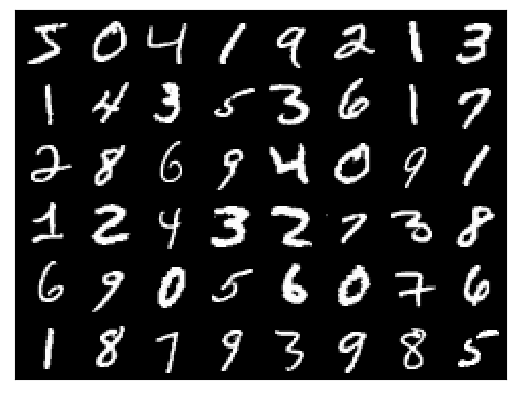

In [7]:
grid = vu.set_grid(X2d, num_cells=48)
vu.show(grid)

In [8]:
X2d_np = X2d.numpy()
(n, dx1, dx2) = X2d_np.shape

X = np.reshape(X2d_np, (-1, dx1 * dx2))

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
Xn = scaler.fit_transform(X)

img_np : 0.0 1.0


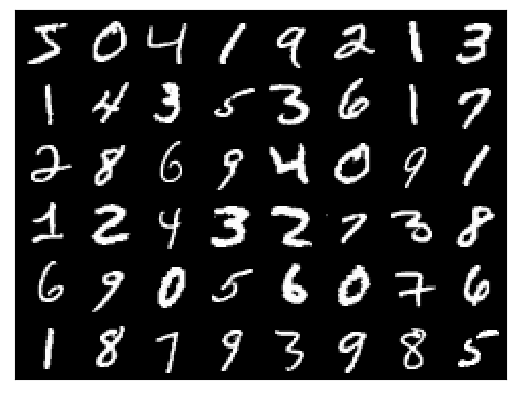

In [10]:
V = np.reshape(Xn, (-1, dx1, dx2))
# V = V.astype('uint8')
grid = vu.set_grid(V, num_cells=48)
vu.show(grid)

In [11]:
print(f"Using {DEVICE} device")

# Define model
model = mu.VAE(d_in=dx1*dx2, d_z=dz, d_h=dh).to(DEVICE)
print(model)



Using cpu device
VAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=40, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [12]:
loss_fn = tu.vae_loss

optimizer = optim.Adam(
    model.parameters(), 
    lr=LEARNING_RATE
)

In [13]:
for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train_vae(train_dataloader, model, loss_fn, optimizer, beta=beta)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    test_loss = tu.test_vae(test_dataloader, model, loss_fn, beta=beta)
    print(f" > Test reconstruction loss: {test_loss:>.2f}")
    
    # Save model
    torch.save(model.state_dict(), model_path)
    print(f"Model {model_path} stored!")
    
print("Done!")

Epoch 1 out of 100
 ------------
Loss: 46463.449219 [    0]/60000
Loss: 11329.616211 [25600]/60000
Loss: 10331.187500 [51200]/60000
 > Training time: 2.63 seconds
 > Test reconstruction loss: 8606.83
Model ../models/vae_ep100_h512_z20_beta075_mnist.pth stored!
Epoch 2 out of 100
 ------------
Loss: 9467.448242 [    0]/60000
Loss: 8806.516602 [25600]/60000
Loss: 8687.871094 [51200]/60000
 > Training time: 2.57 seconds
 > Test reconstruction loss: 6995.54
Model ../models/vae_ep100_h512_z20_beta075_mnist.pth stored!
Epoch 3 out of 100
 ------------
Loss: 8188.311523 [    0]/60000
Loss: 7941.711914 [25600]/60000
Loss: 8003.644531 [51200]/60000
 > Training time: 2.59 seconds
 > Test reconstruction loss: 6368.39
Model ../models/vae_ep100_h512_z20_beta075_mnist.pth stored!
Epoch 4 out of 100
 ------------
Loss: 7707.776855 [    0]/60000
Loss: 7706.665039 [25600]/60000
Loss: 7601.194336 [51200]/60000
 > Training time: 2.57 seconds
 > Test reconstruction loss: 6120.61
Model ../models/vae_ep100_